In [102]:
# Version check. Written for Python 3.5.4
import sys
print(sys.version)
#3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19) 
#[GCC 7.2.0]


3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]


In [103]:
import matplotlib
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from sympy import *
from sympy.utilities.autowrap import autowrap
import re
from matplotlib.lines import Line2D


%matplotlib inline

In [104]:
DATE = "20220315"
MNR = "M019"
DESCR = ""

In [105]:
# Define the path to the input folder containing the output parameters
# Write down the path to the folder that
# contains the parameter estimates of all the finished runs
inputFolder = "/Users/muriel/Documents/LACDR/Projects/PHH/Models/v2_firstRevision/Output/M019/CDDP/20220314_111222/" 

# Define the path to the parameter estimates
fileName = "20220314_111222_MH_M019Model_parameterEstimates_parmset3_cost_80.80.csv" 

# Read in the file with the parameter estimates
file = inputFolder+fileName

In [106]:
# Stress level decrease
def sFunction(s_init,r,t):
    out = s_init * np.exp(-r*t)
    return out

In [107]:
def facetplot(solList, varnames, title = "Model"):
    nrows = len(varnames)
    ncols = len(solList)
    fig, ax = plt.subplots(nrows,ncols,sharex=True, sharey='row')

    for i,sol in enumerate(solList):
        for row in range(0,nrows):
            ax[row,i].plot(t,sol[:,row], color = "#000000")
    
    for row in range(0,nrows):
        ax[row,ncols-1].set_ylabel(varnames[row], rotation = -90, fontsize = 12)
        ax[row,ncols-1].yaxis.set_label_coords(1.03,0.5)


    # add a big axes, hide frame
    fig.add_subplot(111, frameon=False)
    fig.subplots_adjust(hspace=0.1)
    fig.set_figheight(16)
    fig.set_figwidth(12)
    fig.suptitle(title, fontsize = 18)

    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel("Time (h)", fontsize=16)
    plt.ylabel("Intensity (a.u.)", fontsize=16)

In [108]:
def facetplot_addP53(solList, varnames, varnames_total, title = "Model"):
    nrows = len(varnames_total)
    ncols = len(solList)
    
    p53_ids = []
    for i,vn in enumerate(varnames):
        if vn == "p53" or vn == "p53p":
            p53_ids.append(i)
    
    fig, ax = plt.subplots(nrows,ncols,sharex=True, sharey='row')

    for i,sol in enumerate(solList):
        for row in range(0,p53_ids[0]):
            ax[row,i].plot(t,sol[:,row], color = "#000000")
            
        ax[p53_ids[0],i].plot(t,sol[:,p53_ids[0]] + sol[:,p53_ids[1]], color = "#000000")
        
        for row in range(p53_ids[1],nrows):
            ax[row,i].plot(t,sol[:,row+1], color = "#000000")
    
    for row in range(0,nrows):
        ax[row,ncols-1].set_ylabel(varnames_total[row], rotation = -90, fontsize = 12)
        ax[row,ncols-1].yaxis.set_label_coords(1.03,0.5)


    # add a big axes, hide frame
    fig.add_subplot(111, frameon=False)
    fig.subplots_adjust(hspace=0.1)
    fig.set_figheight(16)
    fig.set_figwidth(12)
    fig.suptitle(title, fontsize = 18)

    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel("Time (h)", fontsize=16)
    plt.ylabel("Intensity (a.u.)", fontsize=16)

In [109]:
def facetplot_allP53(solList, varnames, varnames_total, title = "Model"):
    nrows = len(varnames_total)
    ncols = len(solList)
    
    p53_ids = []
    for i,vn in enumerate(varnames):
        if vn == "p53" or vn == "p53p":
            p53_ids.append(i)
    
    fig, ax = plt.subplots(nrows,ncols,sharex=True, sharey='row')

    for i,sol in enumerate(solList):
        for row in range(0,p53_ids[0]):
            ax[row,i].plot(t,sol[:,row], color = "#000000")
            
        ax[p53_ids[0],i].plot(t,sol[:,p53_ids[0]], color = "#000000", linestyle = "dashed")
        ax[p53_ids[0],i].plot(t,sol[:,p53_ids[1]], color = "#000000", linestyle = "dotted")
        ax[p53_ids[0],i].plot(t,sol[:,p53_ids[0]] + sol[:,p53_ids[1]], color = "#000000")
        
        for row in range(p53_ids[1],nrows):
            ax[row,i].plot(t,sol[:,row+1], color = "#000000")
    
    for row in range(0,nrows):
        ax[row,ncols-1].set_ylabel(varnames_total[row], rotation = -90, fontsize = 12)
        ax[row,ncols-1].yaxis.set_label_coords(1.03,0.5)


    # add a big axes, hide frame
    fig.add_subplot(111, frameon=False)
    fig.subplots_adjust(hspace=0.1)
    fig.set_figheight(16)
    fig.set_figwidth(12)
    fig.suptitle(title, fontsize = 18)

    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel("Time (h)", fontsize=16)
    plt.ylabel("Intensity (a.u.)", fontsize=16)

In [110]:
def plot(dzdt, t, header):
    
    figureSize = (5,4)
    #tick_locs = np.arange(min(t), max(t)+1, 12*60)
    #tick_labels = tick_locs/60
    
    t = [i * 1 for i in t]
    
    f1 = plt.figure(figsize = figureSize)
    plt.plot(t,dzdt[:,7], "--", label = 'early G1', color = "k", alpha = 0.2,linewidth=3)
    plt.plot(t,dzdt[:,8], "--", label = 'G0', color = "grey", alpha = 0.2,linewidth=3)
    plt.plot(t,dzdt[:,7]+dzdt[:,8], label = 'G0 & early G1', color = "grey",linewidth=3)
    plt.plot(t,dzdt[:,9], label = 'G1', color = "r",linewidth=3)
    plt.plot(t,dzdt[:,10], label = 'G1/S', color = "y",linewidth=3)
    plt.plot(t,dzdt[:,11], label = 'S & G2', color = "g",linewidth=3)
    #plt.plot(t,dzdt[:,1]+dzdt[:,2]+dzdt[:,3]+dzdt[:,4]+dzdt[:,5], "--", label = 'N', color = "k")
    plt.xlabel('Time (h)', fontsize=22)
    plt.ylabel('Number of cells', fontsize=22)
    plt.legend(fontsize=12)
    plt.xlim(0,(t)[-1]+5)
    plt.title(header, fontsize=24)
    #plt.xticks(tick_locs,tick_labels)
    plt.ylim(0,12)
    plt.show()
    #f.savefig("Plots/atr.pdf", bbox_inches='tight')

    f3 = plt.figure(figsize = figureSize)
    plt.plot(t,dzdt[:,6], label = 'Space', color = "b")
    plt.xlabel('Time (h)', fontsize=18)
    plt.ylabel('Intensity', fontsize=18)
    plt.legend(fontsize=12)
    plt.xlim(0,(t)[-1]+5)
    #plt.xticks(tick_locs,tick_labels)
    plt.ylim(0,1.1)
    plt.show()
    #f.savefig("Plots/atr.pdf", bbox_inches='tight')

In [111]:
# Define ODE model
def p53signaling(z,t,args):
    [sFunction, r, s_init] = args

    # Molecular model
    ## Upstream of p53 ##
    S = sFunction(s_init,r,t)
    
    # Initial states 
    DD,P53rna,P53,P53P,MDM2rna,MDM2,P21rna,P21,BTG2rna,BTG2 = z
    
    # ODEs
    dDD = ks_dd - kd_dd * DD * P53P + S
    dP53rna = ks_p53rna - kd_p53rna * P53rna
    dP53 = ks_p53 * P53rna + k_dp * P53P - k_p * P53 * DD - kd_p53 * P53 - kd_p53_mdm2 * MDM2 * P53
    dP53P = k_p * P53 * DD - k_dp * P53P - kd_p53p * P53P - kd_p53p_mdm2 * MDM2 * P53P
    dMDM2rna = ks_mdm2rna + (ks_mdm2_p53p * P53P**4) / (Km_mdm2**4 + P53P**4) - kd_mdm2rna * MDM2rna
    dMDM2 = ks_mdm2 * MDM2rna - kd_mdm2 * MDM2
    dP21rna = ks_p21rna + (ks_p21_p53p * P53P**4) / (Km_p21**4 + P53P**4) - kd_p21rna * P21rna
    dP21 = ks_p21  * P21rna - kd_p21 * P21
    dBTG2rna = ks_btg2rna + (ks_btg2_p53p * P53P**4) / (Km_btg2**4 + P53P**4) - kd_btg2rna * BTG2rna
    dBTG2 = ks_btg2  * BTG2rna - kd_btg2 * BTG2

    # Output
    dzdt = [dDD, dP53rna, dP53, dP53P, dMDM2rna, dMDM2, dP21rna, dP21, dBTG2rna, dBTG2] 
    return dzdt

In [112]:
# Define the parameters
parameterEst = pd.read_csv(file)

pAllNew = parameterEst["est_value"].values

# Make the parameters global variables
for i in parameterEst.iterrows():
    sText = str(parameterEst.iloc[i[0], 0]) + " = " + str(parameterEst.iloc[i[0], 2])
    print(sText)
    exec(sText)


DD_init = 20.686236117902716
P53P_init = 1.7596079613313225
EC2 = 2.6148250734575456
EC3 = 6.907755278758144
tau1 = 0.03536076442585257
kd_dd = 0.011460536706705802
k_dp = 0.9999999999757858
kd_p53 = 0.032491075346136884
kd_p53p = 0.0019337917852643766
kd_p53_mdm2 = 1.8453747492102481e-06
kd_p53p_mdm2 = 0.01831540180879803
ks_mdm2rna = 0.06530578781195699
ks_mdm2_p53p = 0.09652594268182824
ks_p21rna = 0.0035677806632663026
ks_p21_p53p = 0.134547880986978
Km_mdm2 = 1.5123243320399242
Km_p21 = 4.578632515779258
Km_btg2 = 1.9448494561157263
ks_btg2rna = 0.03109198618942495
ks_btg2_p53p = 0.10774387546193703
sf_p53 = 10.387956746379349
sf_mdm2 = 3.0574485708044796
sf_p21 = 1.2557644255226237
sf_btg2 = 0.9010337794136668
offset_p53 = -28.614550686393088
offset_mdm2 = -2.9565328440702645
offset_p21 = -1.1984911272446903
offset_btg2 = -0.887090427754663
ks_dd = 0.41715970558915577
ks_p53rna = 1.0
k_p = 0.08678420730167019
ks_p53 = 0.06812356297953752
kd_mdm2rna = 0.12775575485772905
ks_mdm2 =

In [113]:
EC1 = 1
kd_p53rna = 1
P53rna_init = 1
MDM2rna_init = 1
P21rna_init = 1
BTG2rna_init = 1
P53_init = 1
MDM2_init = 1
P21_init = 1
BTG2_init = 1
kd_btg2 = 1
kd_p21 = 1
kd_mdm2 = 1

In [114]:
# Check steady states
# ODEs
dDD = ks_dd - kd_dd * DD_init * P53P_init
dP53rna = ks_p53rna - kd_p53rna * P53rna_init
dP53 = ks_p53 * P53rna_init + k_dp * P53P_init - k_p * P53_init * DD_init - kd_p53 * P53_init - kd_p53_mdm2 * MDM2_init * P53_init
dP53P = k_p * P53_init * DD_init - k_dp * P53P_init - kd_p53p * P53P_init - kd_p53p_mdm2 * MDM2_init * P53P_init
dMDM2rna = ks_mdm2rna + (ks_mdm2_p53p * P53P_init**4) / (Km_mdm2**4 + P53P_init**4) - kd_mdm2rna * MDM2rna_init
dMDM2 = ks_mdm2 * MDM2rna_init - kd_mdm2 * MDM2_init
dP21rna = ks_p21rna + (ks_p21_p53p * P53P_init**4) / (Km_p21**4 + P53P_init**4) - kd_p21rna * P21rna_init
dP21 = ks_p21  * P21rna_init - kd_p21 * P21_init
dBTG2rna = ks_btg2rna + (ks_btg2_p53p * P53P_init**4) / (Km_btg2**4 + P53P_init**4) - kd_btg2rna * BTG2rna_init
dBTG2 = ks_btg2  * BTG2rna_init - kd_btg2 * BTG2_init


# Output
steady_state = [dDD, dP53rna, dP53, dP53P, dMDM2rna, dMDM2, dP21rna, dP21, dBTG2rna, dBTG2]
print(steady_state)

[0.0, 0.0, 7.028912330376679e-17, -6.938893903907228e-18, 0.0, 0.0, 3.469446951953614e-18, 0.0, 0.0, 0.0]


In [119]:
# initial condition
z = [DD_init,P53rna_init,P53_init,P53P_init,MDM2rna_init,MDM2_init,P21rna_init,P21_init,BTG2rna_init,BTG2_init]

# time points
t = np.linspace(1,43*3,43*3)

# solve ODE
dzdt_Control = odeint(p53signaling,z,t, args = ([sFunction,tau1,0],))

dzdt_Cisplatin1 = odeint(p53signaling,z,t, args = ([sFunction,tau1,EC1],))
dzdt_Cisplatin2 = odeint(p53signaling,z,t, args = ([sFunction,tau1,EC2],))
dzdt_Cisplatin3 = odeint(p53signaling,z,t, args = ([sFunction,tau1,EC3],))


In [120]:
stressLevels = [0,EC1,EC2,EC3]

sols = list()
for stressLevel in stressLevels:
    # solve ODE
    dzdt = odeint(p53signaling,z,t, args = ([sFunction,tau1,stressLevel],))
    sols.append(dzdt)


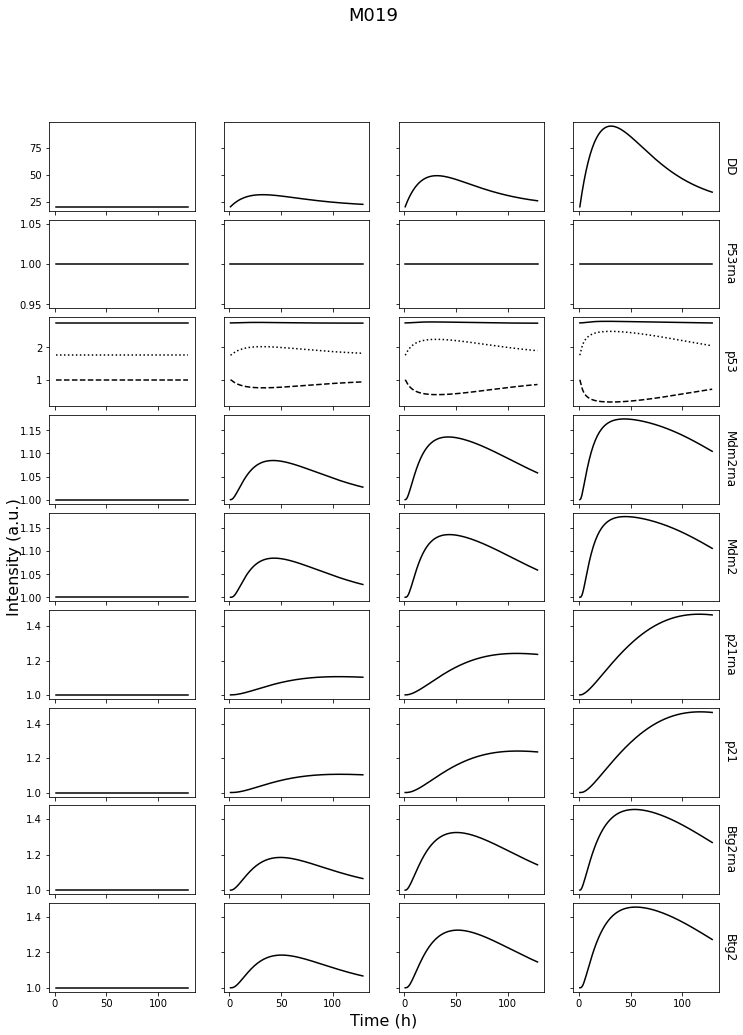

In [121]:
facetplot_allP53([dzdt_Control,dzdt_Cisplatin1,dzdt_Cisplatin2,dzdt_Cisplatin3], 
                  ["DD","P53rna","p53","p53p","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"],
                  ["DD","P53rna","p53","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"],
                 title = MNR)

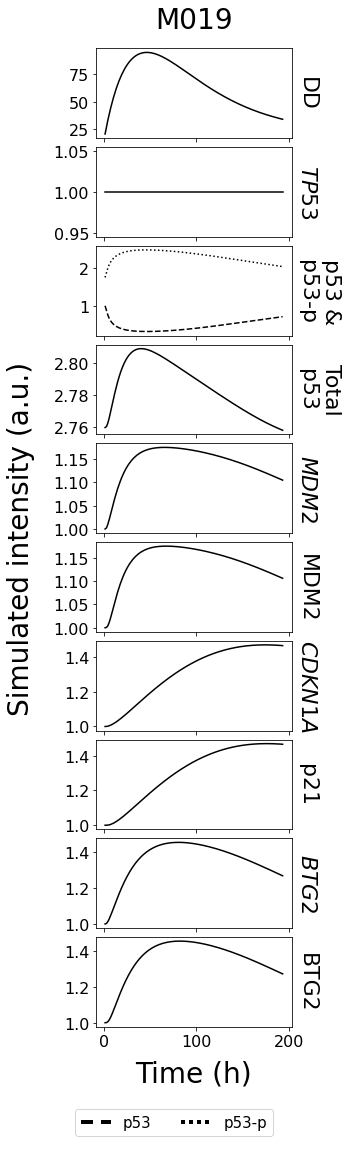

In [122]:
varnames = ["DD","P53rna","p53","p53p","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"]
varnames_total = ["DD","$TP53$","p53 &\np53-p","Total\np53","$MDM2$","MDM2","$CDKN1A$","p21","$BTG2$","BTG2"]
sol = dzdt_Cisplatin3 #dzdt_Control,dzdt_Cisplatin1,dzdt_Cisplatin2,
title = MNR

nrows = len(varnames_total)
fig, ax = plt.subplots(nrows,1,sharex=True, sharey='row')

ax[0].plot(t*1.5,sol[:,0], color = "#000000")
ax[1].plot(t*1.5,sol[:,1], color = "#000000")
ax[2].plot(t*1.5,sol[:,2], color = "#000000", linestyle = "dashed")
ax[2].plot(t*1.5,sol[:,3], color = "#000000", linestyle = "dotted")
ax[3].plot(t*1.5,sol[:,2] + sol[:,3], color = "#000000")
ax[4].plot(t*1.5,sol[:,4], color = "#000000")
ax[5].plot(t*1.5,sol[:,5], color = "#000000")
ax[6].plot(t*1.5,sol[:,6], color = "#000000")
ax[7].plot(t*1.5,sol[:,7], color = "#000000")
ax[8].plot(t*1.5,sol[:,8], color = "#000000")
ax[9].plot(t*1.5,sol[:,9], color = "#000000")


    #ax[row].plot(t*1.5,sol[:,row], color = color, linewidth = 4)
    #ax[row].tick_params(axis = 'both', labelsize=16)
    #ax[row].locator_params(axis='y', nbins=4)

for row in range(0,nrows):
    ax[row].set_ylabel(varnames_total[row], rotation = -90, fontsize = 22)
    ax[row].yaxis.set_label_coords(1.03,0.5)
    ax[row].tick_params(axis = 'both', labelsize=16)
    ax[row].locator_params(axis='y', nbins=4)

    #ax[row].set_ylim(bottom=0)

ax[0].set_title(title,fontdict={'fontsize': 28}, pad=20)

# Legend
custom_lines = [#Line2D([0], [0], color="grey", lw=4),
                Line2D([0], [0], color="#000000", lw=4, dashes=[3,2]),
                Line2D([0], [0], color="#000000", lw=4, dashes=[1,1])]

# add a big axes, hide frame
fig.legend(custom_lines, (["p53","p53-p"]), 
      fontsize = 15, loc = "lower center", borderaxespad=2, ncol = 3)

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
fig.subplots_adjust(hspace=0.1)
fig.set_figheight(18)
fig.set_figwidth(3.5)
# if not title == "":
#     fig.suptitle(title, fontsize = 24)

# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Time (h)", fontsize=28, labelpad=16)
plt.ylabel("Simulated intensity (a.u.)", fontsize=28, labelpad=38)

fig.savefig("/Users/muriel/Documents/LACDR/Projects/PHH/Models/v2_firstRevision/Notebooks/Figures/FigS7_M019_lateTimepoints.pdf", bbox_inches='tight')




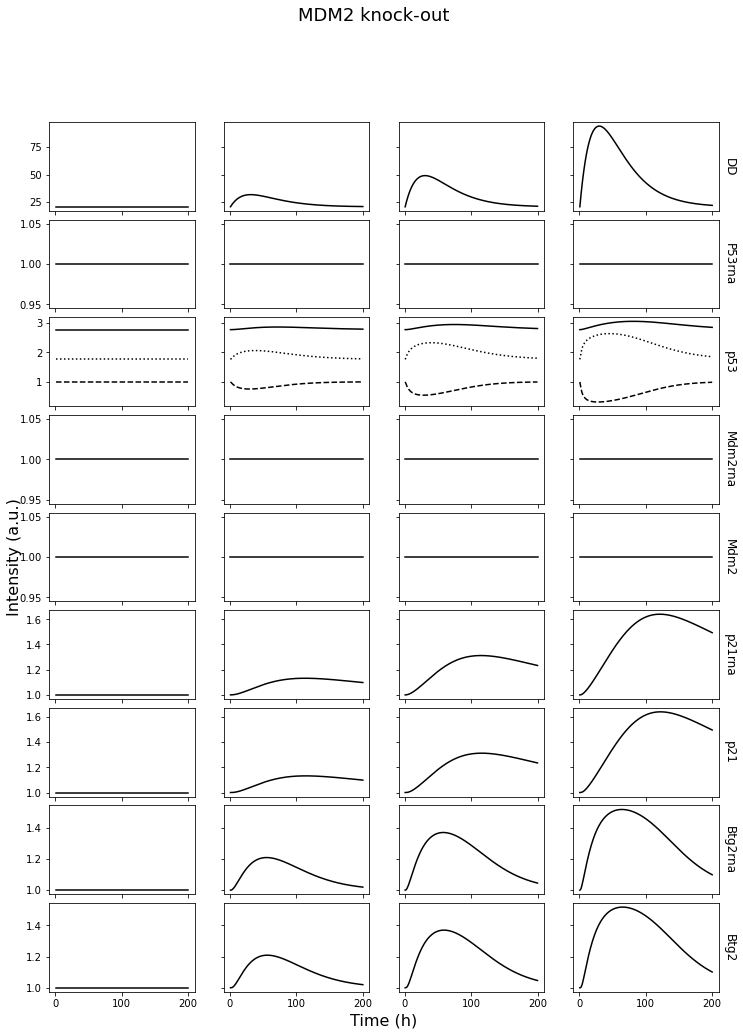

In [17]:
### MDM2 knock out

# Define ODE model
MDM2_KO = 0

def mdm2_KO(z,t,args):
    # Define ODE model
    [sFunction, r, s_init] = args

    # Molecular model
    ## Upstream of p53 ##
    S = sFunction(s_init,r,t)
    
    # Initial states 
    DD,P53rna,P53,P53P,MDM2rna,MDM2,P21rna,P21,BTG2rna,BTG2 = z
    
    # ODEs
    dDD = ks_dd - kd_dd * DD * P53P + S
    dP53rna = ks_p53rna - kd_p53rna * P53rna
    dP53 = ks_p53 * P53rna + k_dp * P53P - k_p * P53 * DD - kd_p53 * P53 - kd_p53_mdm2 * MDM2 * P53
    dP53P = k_p * P53 * DD - k_dp * P53P - kd_p53p * P53P - kd_p53p_mdm2 * MDM2 * P53P
    dMDM2rna = MDM2_KO # ks_mdm2rna + (ks_mdm2_p53p * P53P**4) / (Km_mdm2**4 + P53P**4) - kd_mdm2rna * MDM2rna
    dMDM2 = ks_mdm2 * MDM2rna - kd_mdm2 * MDM2
    dP21rna = ks_p21rna + (ks_p21_p53p * P53P**4) / (Km_p21**4 + P53P**4) - kd_p21rna * P21rna
    dP21 = ks_p21  * P21rna - kd_p21 * P21
    dBTG2rna = ks_btg2rna + (ks_btg2_p53p * P53P**4) / (Km_btg2**4 + P53P**4) - kd_btg2rna * BTG2rna
    dBTG2 = ks_btg2  * BTG2rna - kd_btg2 * BTG2

    # Output
    dzdt = [dDD, dP53rna, dP53, dP53P, dMDM2rna, dMDM2, dP21rna, dP21, dBTG2rna, dBTG2] 

    return dzdt

# initial condition
z = [DD_init,P53rna_init,P53_init,P53P_init,MDM2rna_init,MDM2_init,P21rna_init,P21_init,BTG2rna_init,BTG2_init]


# time points
t = np.linspace(1,200,200)

# solve ODE
dzdt_Control = odeint(mdm2_KO,z,t, args = ([sFunction,tau1,0],))

dzdt_Cisplatin1 = odeint(mdm2_KO,z,t, args = ([sFunction,tau1,EC1],))
dzdt_Cisplatin2 = odeint(mdm2_KO,z,t, args = ([sFunction,tau1,EC2],))
dzdt_Cisplatin3 = odeint(mdm2_KO,z,t, args = ([sFunction,tau1,EC3],))

facetplot_allP53([dzdt_Control,dzdt_Cisplatin1,dzdt_Cisplatin2,dzdt_Cisplatin3], 
                  ["DD","P53rna","p53","p53p","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"],
                  ["DD","P53rna","p53","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"],
                 title = "MDM2 knock-out")

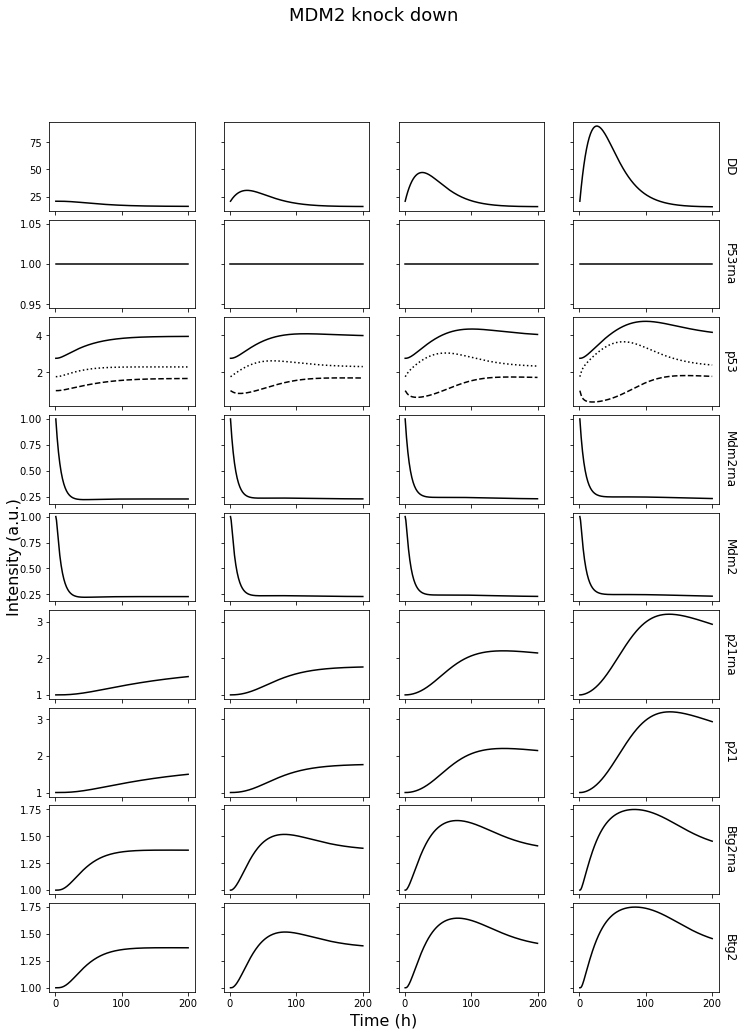

In [18]:
### MDM2 knock down

# Define ODE model
def mdm2_KD(z,t,args):
    # Define ODE model
    [sFunction, r, s_init] = args

    # Molecular model
    ## Upstream of p53 ##
    S = sFunction(s_init,r,t)
    
    # Initial states 
    DD,P53rna,P53,P53P,MDM2rna,MDM2,P21rna,P21,BTG2rna,BTG2 = z
    
    # ODEs
    dDD = ks_dd - kd_dd * DD * P53P + S
    dP53rna = ks_p53rna - kd_p53rna * P53rna
    dP53 = ks_p53 * P53rna + k_dp * P53P - k_p * P53 * DD - kd_p53 * P53 - kd_p53_mdm2 * MDM2 * P53
    dP53P = k_p * P53 * DD - k_dp * P53P - kd_p53p * P53P - kd_p53p_mdm2 * MDM2 * P53P
    dMDM2rna = 0.2 * (ks_mdm2rna + (ks_mdm2_p53p * P53P**4) / (Km_mdm2**4 + P53P**4)) - kd_mdm2rna * MDM2rna
    dMDM2 = ks_mdm2 * MDM2rna - kd_mdm2 * MDM2
    dP21rna = ks_p21rna + (ks_p21_p53p * P53P**4) / (Km_p21**4 + P53P**4) - kd_p21rna * P21rna
    dP21 = ks_p21  * P21rna - kd_p21 * P21
    dBTG2rna = ks_btg2rna + (ks_btg2_p53p * P53P**4) / (Km_btg2**4 + P53P**4) - kd_btg2rna * BTG2rna
    dBTG2 = ks_btg2  * BTG2rna - kd_btg2 * BTG2

    # Output
    dzdt = [dDD, dP53rna, dP53, dP53P, dMDM2rna, dMDM2, dP21rna, dP21, dBTG2rna, dBTG2] 

    return dzdt

# initial condition
z = [DD_init,P53rna_init,P53_init,P53P_init,MDM2rna_init,MDM2_init,P21rna_init,P21_init,BTG2rna_init,BTG2_init]


# time points
t = np.linspace(1,200,200)

# solve ODE
dzdt_Control = odeint(mdm2_KD,z,t, args = ([sFunction,tau1,0],))

dzdt_Cisplatin1 = odeint(mdm2_KD,z,t, args = ([sFunction,tau1,EC1],))
dzdt_Cisplatin2 = odeint(mdm2_KD,z,t, args = ([sFunction,tau1,EC2],))
dzdt_Cisplatin3 = odeint(mdm2_KD,z,t, args = ([sFunction,tau1,EC3],))

facetplot_allP53([dzdt_Control,dzdt_Cisplatin1,dzdt_Cisplatin2,dzdt_Cisplatin3], 
                  ["DD","P53rna","p53","p53p","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"],
                  ["DD","P53rna","p53","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"],
                 title = "MDM2 knock down")

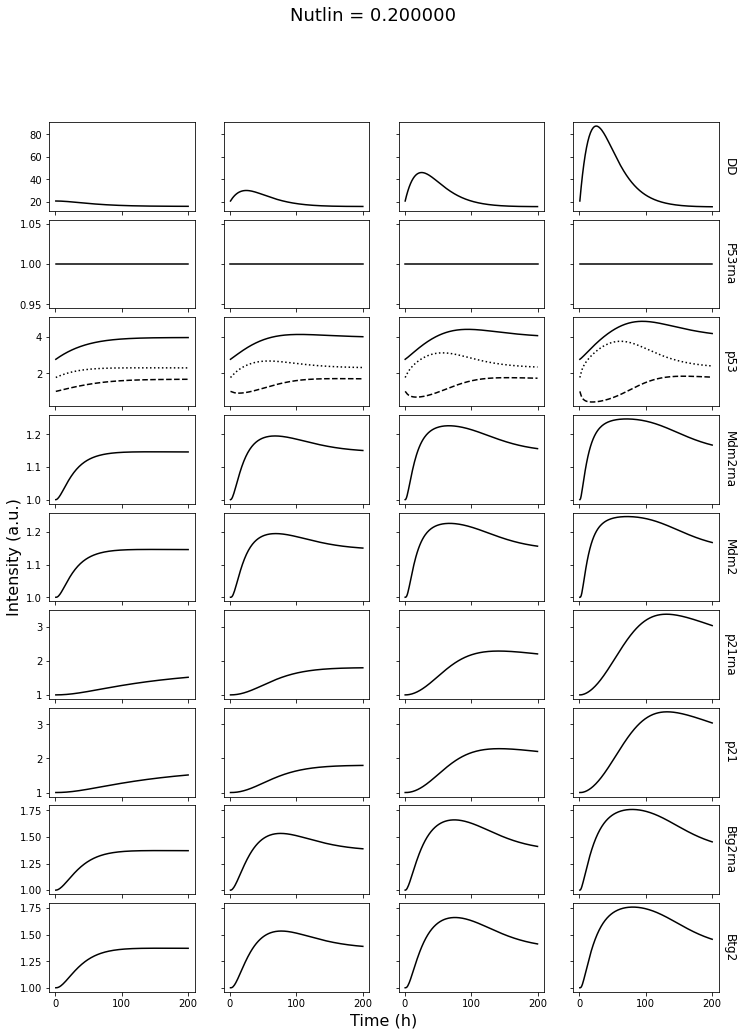

In [19]:
### MDM2 inhibitin with nutlin

# Define ODE model
def nutlin(z,t,args):
    # Define ODE model
    [sFunction, r, s_init, rfactor] = args

    # Molecular model
    ## Upstream of p53 ##
    S = sFunction(s_init,r,t)
    
    # Initial states 
    DD,P53rna,P53,P53P,MDM2rna,MDM2,P21rna,P21,BTG2rna,BTG2 = z
    
    # ODEs
    dDD = ks_dd - kd_dd * DD * P53P + S
    dP53rna = ks_p53rna - kd_p53rna * P53rna
    dP53 = ks_p53 * P53rna + k_dp * P53P - k_p * P53 * DD - kd_p53 * P53 - rfactor * kd_p53_mdm2 * MDM2 * P53
    dP53P = k_p * P53 * DD - k_dp * P53P - kd_p53p * P53P - rfactor * kd_p53p_mdm2 * MDM2 * P53P
    dMDM2rna = ks_mdm2rna + (ks_mdm2_p53p * P53P**4) / (Km_mdm2**4 + P53P**4) - kd_mdm2rna * MDM2rna
    dMDM2 = ks_mdm2 * MDM2rna - kd_mdm2 * MDM2
    dP21rna = ks_p21rna + (ks_p21_p53p * P53P**4) / (Km_p21**4 + P53P**4) - kd_p21rna * P21rna
    dP21 = ks_p21  * P21rna - kd_p21 * P21
    dBTG2rna = ks_btg2rna + (ks_btg2_p53p * P53P**4) / (Km_btg2**4 + P53P**4) - kd_btg2rna * BTG2rna
    dBTG2 = ks_btg2  * BTG2rna - kd_btg2 * BTG2

    # Output
    dzdt = [dDD, dP53rna, dP53, dP53P, dMDM2rna, dMDM2, dP21rna, dP21, dBTG2rna, dBTG2] 

    return dzdt

# initial condition
z = [DD_init,P53rna_init,P53_init,P53P_init,MDM2rna_init,MDM2_init,P21rna_init,P21_init,BTG2rna_init,BTG2_init]

# Nutlin
rfactor = 0.2

# time points
t = np.linspace(1,200,200)

# solve ODE
dzdt_Control = odeint(nutlin,z,t, args = ([sFunction,tau1,0, rfactor],))

dzdt_Cisplatin1 = odeint(nutlin,z,t, args = ([sFunction,tau1,EC1,rfactor],))
dzdt_Cisplatin2 = odeint(nutlin,z,t, args = ([sFunction,tau1,EC2,rfactor],))
dzdt_Cisplatin3 = odeint(nutlin,z,t, args = ([sFunction,tau1,EC3,rfactor],))

facetplot_allP53([dzdt_Control,dzdt_Cisplatin1,dzdt_Cisplatin2,dzdt_Cisplatin3], 
                  ["DD","P53rna","p53","p53p","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"],
                  ["DD","P53rna","p53","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"],
                 title = "Nutlin = %f" % rfactor)

In [20]:
def facetplot(solList, varnames, plot_titles, title = "Model"):
    nrows = len(varnames)
    ncols = len(solList)
    fig, ax = plt.subplots(nrows,ncols,sharex=True, sharey='row')

    for i,sol in enumerate(solList):
        for row in range(0,nrows):
            ax[row,i].plot(t,sol[:,row], color = "#000000")
    
    for row in range(0,nrows):
        ax[row,ncols-1].set_ylabel(varnames[row], rotation = -90, fontsize = 12)
        ax[row,ncols-1].yaxis.set_label_coords(1.03,0.5)
    
    for j,pt in enumerate(plot_titles):
        ax[0, j].set_title(pt,
                           fontdict={'fontsize': 24}, pad=20)

    # add a big axes, hide frame
    fig.add_subplot(111, frameon=False)
    fig.subplots_adjust(hspace=0.1)
    fig.set_figheight(16)
    fig.set_figwidth(12)
    fig.suptitle(title, fontsize = 18)

    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel("Time (h)", fontsize=16)
    plt.ylabel("Intensity (a.u.)", fontsize=16)

In [21]:
dd = dzdt_Control[::,0]
p53_rna = dzdt_Control[::,1]
p53_tot = sf_p53 * (dzdt_Control[::,2] + dzdt_Control[::,3]) + offset_p53
mdm2 = sf_mdm2 * dzdt_Control[::,5] + offset_mdm2
p21 = sf_p21 * dzdt_Control[::,7] + offset_p21
btg2 = sf_btg2 * dzdt_Control[::,9] + offset_btg2
scaled_Control = np.vstack((dd,p53_rna, p53_tot,mdm2,p21,btg2)).T

dd = dzdt_Cisplatin1[::,0]
p53_rna = dzdt_Cisplatin1[::,1]
p53_tot = sf_p53 * (dzdt_Cisplatin1[::,2] + dzdt_Cisplatin1[::,3]) + offset_p53
mdm2 = sf_mdm2 * dzdt_Cisplatin1[::,5] + offset_mdm2
p21 = sf_p21 * dzdt_Cisplatin1[::,7] + offset_p21
btg2 = sf_btg2 * dzdt_Cisplatin1[::,9] + offset_btg2
scaled_Cisplatin1 = np.vstack((dd,p53_rna, p53_tot,mdm2,p21,btg2)).T

dd = dzdt_Cisplatin2[::,0]
p53_rna = dzdt_Cisplatin2[::,1]
p53_tot = sf_p53 * (dzdt_Cisplatin2[::,2] + dzdt_Cisplatin2[::,3]) + offset_p53
mdm2 = sf_mdm2 * dzdt_Cisplatin2[::,5] + offset_mdm2
p21 = sf_p21 * dzdt_Cisplatin2[::,7] + offset_p21
btg2 = sf_btg2 * dzdt_Cisplatin2[::,9] + offset_btg2
scaled_Cisplatin2 = np.vstack((dd,p53_rna, p53_tot,mdm2,p21,btg2)).T

dd = dzdt_Cisplatin3[::,0]
p53_rna = dzdt_Cisplatin3[::,1]
p53_tot = sf_p53 * (dzdt_Cisplatin3[::,2] + dzdt_Cisplatin3[::,3]) + offset_p53
mdm2 = sf_mdm2 * dzdt_Cisplatin3[::,5] + offset_mdm2
p21 = sf_p21 * dzdt_Cisplatin3[::,7] + offset_p21
btg2 = sf_btg2 * dzdt_Cisplatin3[::,9] + offset_btg2
scaled_Cisplatin3 = np.vstack((dd,p53_rna, p53_tot,mdm2,p21,btg2)).T

scaled_Cisplatin3;

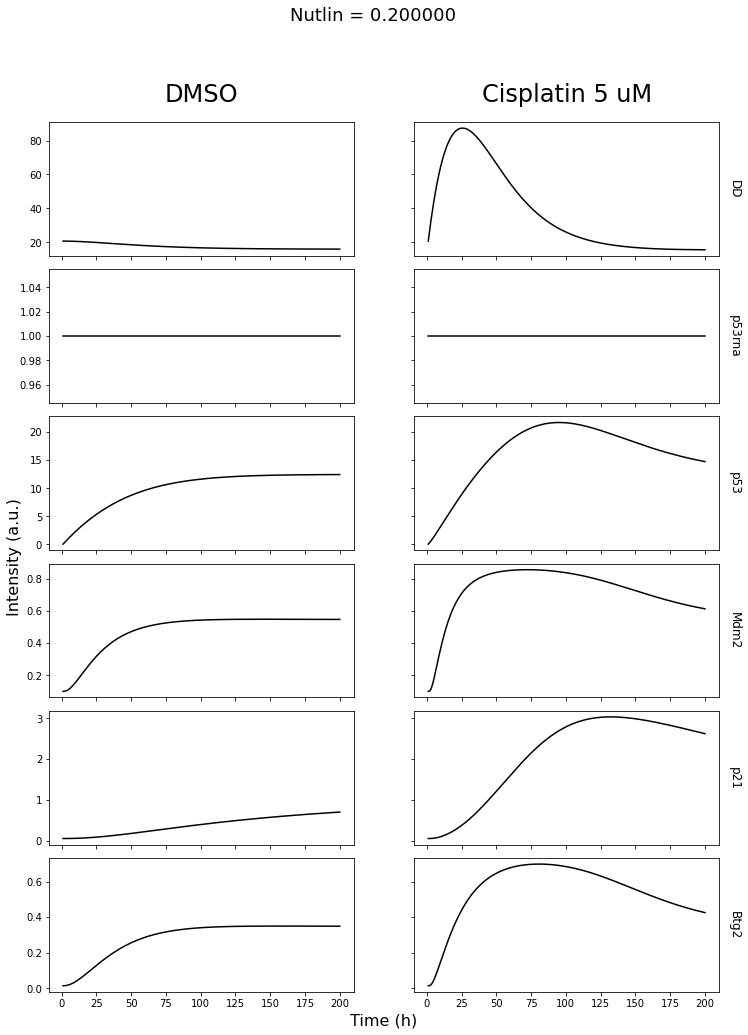

In [22]:
facetplot([scaled_Control,scaled_Cisplatin3], 
          ["DD","p53rna","p53","Mdm2","p21","Btg2"],
          plot_titles = ["DMSO", "Cisplatin 5 uM"],
            title = "Nutlin = %f" % rfactor)

1.265323779296901


(0.0, 6.907755278758144)

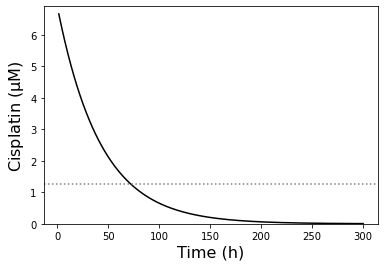

In [23]:
print(sFunction(EC3,tau1,48))
rest = sFunction(EC3,tau1,48)
plt.plot(t*1.5,sFunction(EC3,tau1,t), color = "k")
plt.axhline(y = rest, color = "grey", linestyle = "dotted")
plt.xlabel("Time (h)", fontsize=16)
plt.ylabel("Cisplatin ($\mathrm{\mu M}$)", fontsize=16)
plt.ylim(0,EC3)

In [24]:
# Change r ans checkout result on p53 and Mdm2 protein in steady state

In [25]:
# rlist
rlist = [0.01,0.1,1,10,100]

In [26]:
from scipy.optimize import fsolve
from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

p53rna = []
p53total = []
mdm2total = []
p53only = []
p53ponly = []
for r in rlist:
    eq = fsolve(nutlin, 
                [DD_init,P53rna_init,P53_init,P53P_init,MDM2rna_init,MDM2_init,P21rna_init,P21_init,BTG2rna_init,BTG2_init], 
                args=(0, [sFunction, tau1, 0, r]))
    #eq
    p53tot = eq[2]+eq[3]
    mdm2 = eq[4]
    
    p53rna.append(eq[1])
    p53only.append(eq[2])
    p53ponly.append(eq[3])
    p53total.append(p53tot)
    mdm2total.append(mdm2)

#p53rna

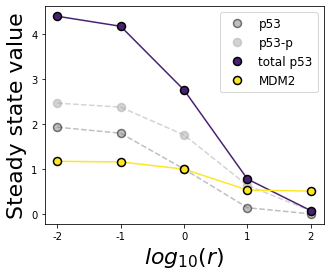

In [28]:
viridis = cm.get_cmap('viridis', 12)
reps = np.linspace(0,1,10)
viridis(reps[1])

figureSize = (5,4)
f1 = plt.figure(figsize = figureSize)

# plt.plot(np.log10(rlist),p53rna, "--", color = 'grey', alpha = 0.5)
# plt.plot(np.log10(rlist),p53rna, "o", label = 'p53', markersize=8, markerfacecolor=viridis(reps[5]),
#              markeredgewidth=1.5, markeredgecolor="k", alpha = 0.5)

plt.plot(np.log10(rlist),p53only, "--", color = 'grey', alpha = 0.5)
plt.plot(np.log10(rlist),p53only, "o", label = 'p53', markersize=8, markerfacecolor='grey',
             markeredgewidth=1.5, markeredgecolor="k", alpha = 0.5)

plt.plot(np.log10(rlist),p53ponly, "--", color = 'darkgrey', alpha = 0.5)
plt.plot(np.log10(rlist),p53ponly, "o", label = 'p53-p', markersize=8, markerfacecolor='darkgrey',
             markeredgewidth=1.5, markeredgecolor="darkgrey", alpha = 0.5)

plt.plot(np.log10(rlist),p53total, "-", color = viridis(reps[1]))
plt.plot(np.log10(rlist),p53total, "o", label = 'total p53', markersize=8, markerfacecolor=viridis(reps[1]),
             markeredgewidth=1.5, markeredgecolor="k")

plt.plot(np.log10(rlist),mdm2total, "-", color = viridis(reps[9]))
plt.plot(np.log10(rlist),mdm2total, "o", label = 'MDM2', markersize=8, markerfacecolor=viridis(reps[9]),
             markeredgewidth=1.5, markeredgecolor="k")

plt.xlabel('$log_{10}(r)$', fontsize=22)
plt.ylabel("Steady state value", fontsize=22)
#plt.ylabel('Mdm2', fontsize=22, color = 'blue')
plt.legend(fontsize=12)
#plt.xlim(0,(t)[-1]+5)
#plt.title("r = " + str(r), fontsize=24)
plt.xticks(np.log10(rlist),[round(i) for i in np.log10(rlist)])
#plt.ylim(0,12)
plt.show()
f1.savefig("/Users/muriel/Documents/LACDR/Projects/PHH/Models/v2_firstRevision/Notebooks/Figures/Fig5D_SteadyState_changing_r.pdf", bbox_inches='tight')



In [52]:
# Check what a different feedback of MDM2 on p53 does

# Define ODE model
def changedFeedback(z,t,args):
    [sFunction, r, s_init] = args

    # Molecular model
    ## Upstream of p53 ##
    S = sFunction(s_init,r,t)
    
    # Initial states 
    DD,P53rna,P53,P53P,MDM2rna,MDM2,P21rna,P21,BTG2rna,BTG2 = z
        
    # ODEs
    dDD = ks_dd - kd_dd * DD * P53P + S
    dP53rna = ks_p53rna - kd_p53rna * P53rna
    dP53 = ks_p53 * P53rna + k_dp * P53P - k_p * P53 * DD - kd_p53 * P53 - rfactor * kd_p53_mdm2 * MDM2**n * P53**n / (K**n + MDM2**n + P53**n)
    dP53P = k_p * P53 * DD - k_dp * P53P - kd_p53p * P53P - rfactor * kd_p53p_mdm2 * MDM2**n * P53P**n / (K**n + MDM2**n + P53P**n)
    dMDM2rna = ks_mdm2rna + (ks_mdm2_p53p * P53P**4) / (Km_mdm2**4 + P53P**4) - kd_mdm2rna * MDM2rna
    dMDM2 = ks_mdm2 * MDM2rna - kd_mdm2 * MDM2
    dP21rna = ks_p21rna + (ks_p21_p53p * P53P**4) / (Km_p21**4 + P53P**4) - kd_p21rna * P21rna
    dP21 = ks_p21  * P21rna - kd_p21 * P21
    dBTG2rna = ks_btg2rna + (ks_btg2_p53p * P53P**4) / (Km_btg2**4 + P53P**4) - kd_btg2rna * BTG2rna
    dBTG2 = ks_btg2  * BTG2rna - kd_btg2 * BTG2

    # Output
    dzdt = [dDD, dP53rna, dP53, dP53P, dMDM2rna, dMDM2, dP21rna, dP21, dBTG2rna, dBTG2] 
    return dzdt

In [77]:
n = 4
K = 1
rfactor = 10

# Recalculate steady states
ks_dd = kd_dd * DD_init * P53P_init
ks_p53rna = kd_p53rna * P53rna_init
k_p = (k_dp * P53P_init + kd_p53p * P53P_init + (rfactor * kd_p53p_mdm2 * MDM2_init**n * P53P_init**n) / (K**n + MDM2_init**n + P53P_init**n)) / (P53_init * DD_init)
ks_p53 = (kd_p53 * P53_init + rfactor * kd_p53_mdm2 * MDM2_init**n * P53_init**n / (K**n + MDM2_init**n + P53_init**n) + kd_p53p * P53P_init + rfactor * kd_p53p_mdm2 * MDM2_init**n * P53P_init**n / (K**n + MDM2_init**n + P53P_init**n)) / P53rna_init
kd_mdm2rna = (ks_mdm2rna + (ks_mdm2_p53p * P53P_init**4) / (Km_mdm2**4 + P53P_init**4)) / MDM2rna_init
ks_mdm2 = kd_mdm2 * MDM2_init / MDM2rna_init
kd_p21rna = (ks_p21rna + (ks_p21_p53p * P53P_init**4) / (Km_p21**4 + P53P_init**4)) / P21rna_init
ks_p21 = kd_p21 * P21_init / P21rna_init
kd_btg2rna = (ks_btg2rna + (ks_btg2_p53p * P53P_init**4) / (Km_btg2**4 + P53P_init**4)) / BTG2rna_init
ks_btg2 = kd_btg2 * BTG2_init/ BTG2rna_init


# Check steady states
# ODEs
dDD = ks_dd - kd_dd * DD_init * P53P_init
dP53rna = ks_p53rna - kd_p53rna * P53rna_init
dP53 = ks_p53 * P53rna_init + k_dp * P53P_init - k_p * P53_init * DD_init - kd_p53 * P53_init - rfactor * kd_p53_mdm2 * MDM2_init**n * P53_init**n/ (K**n + MDM2_init**n + P53_init**n)
dP53P = k_p * P53_init * DD_init - k_dp * P53P_init - kd_p53p * P53P_init - rfactor * kd_p53p_mdm2 * MDM2_init**n * P53P_init**n / (K**n + MDM2_init**n + P53P_init**n)
dMDM2rna = ks_mdm2rna + (ks_mdm2_p53p * P53P_init**4) / (Km_mdm2**4 + P53P_init**4) - kd_mdm2rna * MDM2rna_init
dMDM2 = ks_mdm2 * MDM2rna_init - kd_mdm2 * MDM2_init
dP21rna = ks_p21rna + (ks_p21_p53p * P53P_init**4) / (Km_p21**4 + P53P_init**4) - kd_p21rna * P21rna_init
dP21 = ks_p21  * P21rna_init - kd_p21 * P21_init
dBTG2rna = ks_btg2rna + (ks_btg2_p53p * P53P_init**4) / (Km_btg2**4 + P53P_init**4) - kd_btg2rna * BTG2rna_init
dBTG2 = ks_btg2  * BTG2rna_init - kd_btg2 * BTG2_init


# Output
steady_state = [dDD, dP53rna, dP53, dP53P, dMDM2rna, dMDM2, dP21rna, dP21, dBTG2rna, dBTG2]
print(steady_state)


[0.0, 0, 4.6946801101569596e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [78]:
# initial condition
z = [DD_init,P53rna_init,P53_init,P53P_init,MDM2rna_init,MDM2_init,P21rna_init,P21_init,BTG2rna_init,BTG2_init]

# time points
t = np.linspace(1,43,43)

# solve ODE
dzdt_Control = odeint(changedFeedback,z,t, args = ([sFunction,tau1,0],))

dzdt_Cisplatin1 = odeint(changedFeedback,z,t, args = ([sFunction,tau1,EC1],))
dzdt_Cisplatin2 = odeint(changedFeedback,z,t, args = ([sFunction,tau1,EC2],))
dzdt_Cisplatin3 = odeint(changedFeedback,z,t, args = ([sFunction,tau1,EC3],))


In [79]:
stressLevels = [0,EC1,EC2,EC3]

sols = list()
for stressLevel in stressLevels:
    # solve ODE
    dzdt = odeint(p53signaling,z,t, args = ([sFunction,tau1,stressLevel],))
    sols.append(dzdt)


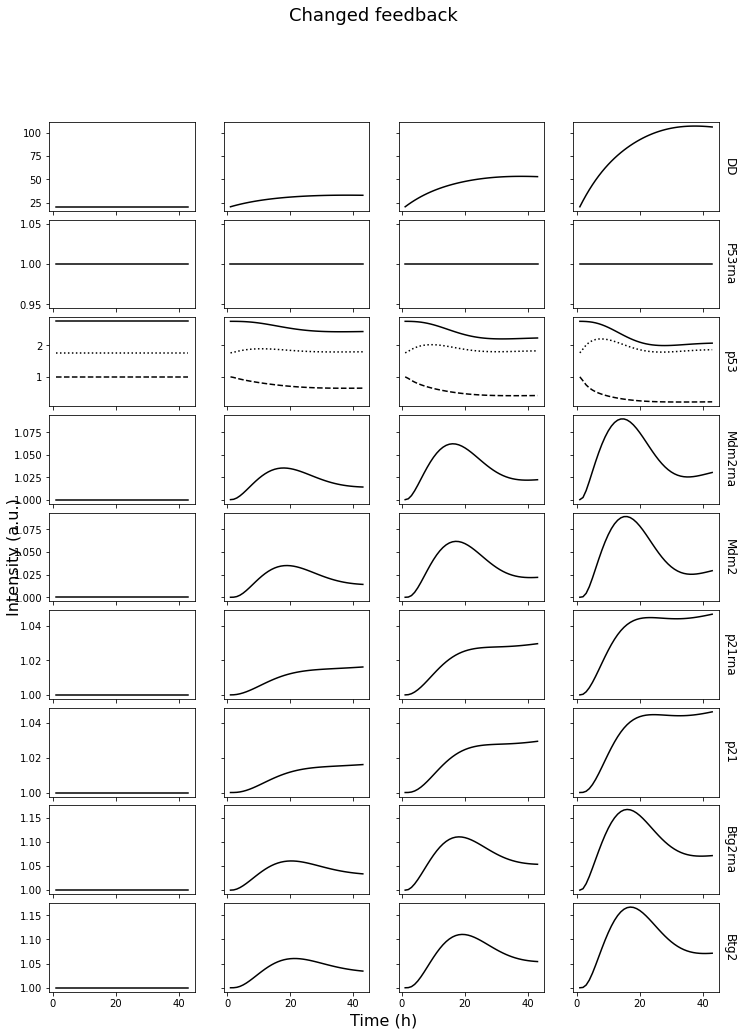

In [80]:
facetplot_allP53([dzdt_Control,dzdt_Cisplatin1,dzdt_Cisplatin2,dzdt_Cisplatin3], 
                  ["DD","P53rna","p53","p53p","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"],
                  ["DD","P53rna","p53","Mdm2rna","Mdm2","p21rna","p21","Btg2rna","Btg2"],
                 title = "Changed feedback")